In [1]:
import numpy
from src import conv
from src.optim.adam import Adam
from src.optim.rmsprop import RMSprop
from src.optim.sgd import SGD
import matplotlib.pyplot as plt
from src import weights
from src.attention import SelfAttention

In [2]:
# Creating Convolution layers.
in_array = numpy.array([1, 2, 3, 4, 5])
kernel_1 = numpy.random.randn(3, 1)
stride = 1
padding_1 = 0 

kernel_2 = numpy.random.randn(5, 1)
padding_2 = 1

out = conv.Conv1D(kernel=kernel_1, stride=stride, padding=padding_1)
out_1 = out.forward(in_array=in_array)

out2 = conv.Conv1D(kernel=kernel_2, stride=stride, padding=padding_2)
out_2 = out.forward(in_array=out_1)

print(out_2)

[52.21900373]


In [3]:
# The following three cells are weight initialization techniques.
shape = (3, 3)

weights.uniform(shape)

array([[0.9625963 , 0.12028015, 0.00723881],
       [0.88909657, 0.1936732 , 0.02075716],
       [0.69296822, 0.28721447, 0.29365749]])

In [4]:
weights.kaiming(shape)

array([[-0.04201171, -0.74741671, -0.74678428],
       [ 0.81643882,  0.08749444, -0.20256214],
       [ 0.52382128, -0.49607184, -0.38192434]])

In [5]:
weights.glorot(shape)

array([[-0.42324907, -0.78659985, -0.46372375],
       [ 0.82890968, -0.57625851,  0.79756378],
       [ 0.0568559 ,  0.73015408, -0.19303284]])

In [6]:
# Example 3: Adam Optimizer

# For simplicity, we are defining and hardcoding the grad. 
def loss(x):
    return 2*x**2+4*x+5
def grad(x): 
    return 2*x+4

def converge(w0, w1): 
    return (w0 == w1)

In [7]:
w_0 = 0
b_0 = 0

adam = Adam()
t = 2

is_converged = False

while not is_converged: 
    dw = grad(w_0)
    db = grad(b_0)
    
    w_old = w_0
    w_0, b_0 = adam.update(t, w=w_0, b=b_0, dw=dw, db=db)
    
    if converge(w_old, w_0): 
        print(f"Converged after {t+1} iterations")
        break 
    else: 
        print(f"Iteration: {t+1}, Weight: {w_0}")
        t+=1

Iteration: 3, Weight: -0.00744136820936719
Iteration: 4, Weight: -0.01602514472404349
Iteration: 5, Weight: -0.02511954575500244
Iteration: 6, Weight: -0.03450100141419373
Iteration: 7, Weight: -0.044063657431527105
Iteration: 8, Weight: -0.05374871019933713
Iteration: 9, Weight: -0.06351991925660727
Iteration: 10, Weight: -0.07335323680522712
Iteration: 11, Weight: -0.0832317907133086
Iteration: 12, Weight: -0.09314321332125006
Iteration: 13, Weight: -0.10307811195832563
Iteration: 14, Weight: -0.11302914158783962
Iteration: 15, Weight: -0.1229904158603915
Iteration: 16, Weight: -0.13295711845345992
Iteration: 17, Weight: -0.1429252381485327
Iteration: 18, Weight: -0.15289138317218112
Iteration: 19, Weight: -0.16285264790834914
Iteration: 20, Weight: -0.17280651515184925
Iteration: 21, Weight: -0.18275078305174308
Iteration: 22, Weight: -0.19268350956299515
Iteration: 23, Weight: -0.20260296954270007
Iteration: 24, Weight: -0.21250762112891078
Iteration: 25, Weight: -0.222396079035345

/home/akshathm/work/from-scratch/src/optim/adam.py:46: RuntimeWarning: invalid value encountered in sqrt
  b -= self.eta * (mb_corr / (np.sqrt(vb_corr) + self.epsilon))


In [10]:
# Example 4: Using RMSprop 
rms = RMSprop()

w_0 = 0 
b_0 = 0

t = 1

while not is_converged:
    dw = grad(w_0)
    db = grad(b_0)
    
    w_old = w_0
    w_0, b_0 = rms.update(w=w_0, b=b_0, dw=dw, db=db)
    
    if converge(w_old, w_0): 
        print(f"Converged after {t+1} iterations")
        break 
    else: 
        print(f"Iteration: {t+1}, Weight: {w_0}")
        t+=1

Iteration: 2, Weight: -0.0316227763516838
Iteration: 3, Weight: -0.05439036294791762
Iteration: 4, Weight: -0.07336631763177721
Iteration: 5, Weight: -0.09015260724913482
Iteration: 6, Weight: -0.10549122247104756
Iteration: 7, Weight: -0.11979514230573374
Iteration: 8, Weight: -0.1333210553796607
Iteration: 9, Weight: -0.1462407819667399
Iteration: 10, Weight: -0.15867562676899735
Iteration: 11, Weight: -0.17071473587242586
Iteration: 12, Weight: -0.18242570152957144
Iteration: 13, Weight: -0.19386106923212176
Iteration: 14, Weight: -0.20506252723888668
Iteration: 15, Weight: -0.21606371222926812
Iteration: 16, Weight: -0.22689215088759498
Iteration: 17, Weight: -0.23757064142839418
Iteration: 18, Weight: -0.2481182603850218
Iteration: 19, Weight: -0.2585511116980182
Iteration: 20, Weight: -0.2688828943069777
Iteration: 21, Weight: -0.27912533920376414
Iteration: 22, Weight: -0.2892885508326484
Iteration: 23, Weight: -0.29938127722331515
Iteration: 24, Weight: -0.3094111262241643
Iter

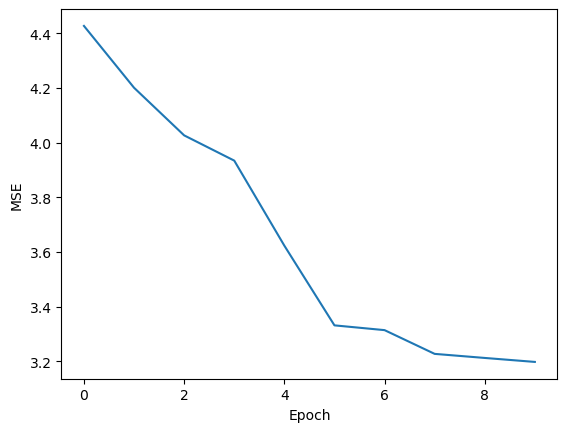

In [11]:
# Example 5: Using SGD for Linear Regression
numpy.random.seed(0)

X = numpy.random.rand(100)
y = 2 * X + 1 + numpy.random.randn(100)

sgd = SGD()

m, b, log, mse = sgd.update(X, y)

plt.plot(mse)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [12]:
# Example 6: Self-Attention

self_att = SelfAttention()
self_att.operation()

This is the final softmax output: [[6.34526455e-06 1.19222125e-04 1.50819389e-06 ... 8.49450858e-08
  3.12444875e-04 1.42580434e-06]
 [3.47427748e-06 9.57436198e-05 2.22310618e-06 ... 1.03006686e-08
  3.50290575e-04 1.03658537e-06]
 [2.82426725e-06 8.53291717e-05 4.04185569e-06 ... 1.01099981e-08
  3.07564217e-04 4.39083449e-07]
 [1.60689023e-06 3.30511402e-05 1.26095084e-06 ... 1.12013749e-08
  2.58370890e-04 1.33201114e-06]
 [9.25610485e-06 2.20692772e-05 5.55243199e-06 ... 9.52640909e-09
  4.29223241e-04 3.22404728e-06]
 [2.74168219e-06 2.94807587e-05 1.16634937e-06 ... 1.03780282e-08
  2.18373797e-04 1.60976018e-06]]


array([[6.34526455e-06, 1.19222125e-04, 1.50819389e-06, ...,
        8.49450858e-08, 3.12444875e-04, 1.42580434e-06],
       [3.47427748e-06, 9.57436198e-05, 2.22310618e-06, ...,
        1.03006686e-08, 3.50290575e-04, 1.03658537e-06],
       [2.82426725e-06, 8.53291717e-05, 4.04185569e-06, ...,
        1.01099981e-08, 3.07564217e-04, 4.39083449e-07],
       [1.60689023e-06, 3.30511402e-05, 1.26095084e-06, ...,
        1.12013749e-08, 2.58370890e-04, 1.33201114e-06],
       [9.25610485e-06, 2.20692772e-05, 5.55243199e-06, ...,
        9.52640909e-09, 4.29223241e-04, 3.22404728e-06],
       [2.74168219e-06, 2.94807587e-05, 1.16634937e-06, ...,
        1.03780282e-08, 2.18373797e-04, 1.60976018e-06]])